In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
import plot_likert

In [3]:
sns.set_style('ticks')
import warnings
warnings.filterwarnings('ignore')

# database input

In [4]:
df = pd.read_excel('Authenticity.xlsx')


In [5]:
df.head(5)

,Respondent_ID,I_frequently_pretend_to_enjoy_something_when_in_actuality_I_really_don_t,I_try_to_act_in_a_manner_that_is_consistent_with_my_personally_held_values_even_if_others_criticize_or_reject_me_for_doing_so,I_find_that_my_behavior_typically_expresses_my_values,I_rarely_if_ever_put_on_a_false_face_for_others_to_see,I_am_willing_to_endure_negative_consequences_by_expressing_my_true_beliefs_about_things,Is_depressed_blue,Is_relaxed_handles_stress_well,Can_be_tense,Worries_a_lot,...,If_I_had_my_way_I_would_not_be_working_in_my_industry_a_year_from_now_Scale,I_am_planning_on_searching_for_a_new_job_within_my_industry_within_the_next_year_Scale,I_frequently_think_of_leaving_my_job_at_this_organization_Scale,If_I_have_my_own_way_I_will_not_be_working_for_this_organization_one_year_from_now_Scale,Turnover intention,At_my_work_I_feel_bursting_with_energy_Scale,I_am_enthusiastic_about_my_job_Scale,I_am_immersed_in_my_work_Scale,Work engagement,Gender
0,114376890184,Strongly disagree,Strongly agree,Agree,Agree,Agree,Neither agree or disagree,Disagree,Agree,Neither agree or disagree,...,1.0,2.0,1.0,1.0,5,0.0,3.0,6.0,9,1.0
1,114376847890,Agree,Neither agree or disagree,Agree,Strongly disagree,Neither agree or disagree,Neither agree or disagree,Agree,Neither agree or disagree,Disagree,...,5.0,1.0,5.0,5.0,16,1.0,1.0,1.0,3,0.0
2,114376729077,Disagree,Agree,Agree,Agree,Agree,Disagree,Disagree,Agree,Neither agree or disagree,...,1.0,4.0,5.0,3.0,13,4.0,4.0,5.0,13,2.0
3,114376688439,Disagree,Agree,Strongly agree,Agree,Strongly agree,Strongly disagree,Agree,Neither agree or disagree,Disagree,...,2.0,2.0,2.0,2.0,8,4.0,4.0,3.0,11,2.0
4,114376640871,Disagree,Strongly agree,Strongly agree,Agree,Agree,Strongly disagree,Agree,Agree,Disagree,...,1.0,1.0,1.0,1.0,4,5.0,5.0,5.0,15,2.0


In [6]:
df.shape

(644, 170)

##  Numerical

In [7]:
numerical = df.select_dtypes(include = ['float64', 'int64'])
print(len(numerical.columns))

91


In [8]:
numerical = numerical.dropna()

In [9]:
numerical.columns = numerical.columns.str.strip()


In [10]:
numerical.head(2)

,Respondent_ID,What_is_your_age,If_this_next_question_is_not_pertinent_to_your_job_you_could_skip_it_How_many_patients_were_assigned_to_you_on_your_last_shift,How_many_years_of_work_experience_do_you_have_since_graduating_Include_years_of_work_in_any_occupation,What_year_did_you_graduate_from_your_nursing_degree_program,How_long_in_years_have_you_worked_in_your_current_place_of_employment,What_is_the_average_number_of_hours_you_work_each_week,What_is_your_shift_length_in_hours,I_frequently_pretend_to_enjoy_something_when_in_actuality_I_really_don_t_Scale,I_try_to_act_in_a_manner_that_is_consistent_with_my_personally_held_values_even_if_others_criticize_or_reject_me_for_doing_so_Scale,...,If_I_had_my_way_I_would_not_be_working_in_my_industry_a_year_from_now_Scale,I_am_planning_on_searching_for_a_new_job_within_my_industry_within_the_next_year_Scale,I_frequently_think_of_leaving_my_job_at_this_organization_Scale,If_I_have_my_own_way_I_will_not_be_working_for_this_organization_one_year_from_now_Scale,Turnover intention,At_my_work_I_feel_bursting_with_energy_Scale,I_am_enthusiastic_about_my_job_Scale,I_am_immersed_in_my_work_Scale,Work engagement,Gender
0,114376890184,62.0,70.0,27.0,1996.0,2.0,30.0,8.0,1,5,...,1.0,2.0,1.0,1.0,5,0.0,3.0,6.0,9,1.0
1,114376847890,47.0,31.0,25.0,2001.0,20.0,36.0,12.0,4,3,...,5.0,1.0,5.0,5.0,16,1.0,1.0,1.0,3,0.0


In [11]:
question = df.select_dtypes(include = ['float64', 'int64'])
mainColumn = df.select_dtypes(include = ['float64', 'int64'])


In [12]:
for column in mainColumn.columns:  
    num_unique_categories = mainColumn[column].nunique()
    if num_unique_categories == 5:
        column_locations_to_drop =mainColumn.columns.get_loc(column)
#         print(mainColumn.columns.get_loc(column))
        mainColumn.drop(mainColumn.columns[column_locations_to_drop], axis=1, inplace=True)




In [13]:
mainColumn.drop(mainColumn.columns[0], axis=1, inplace=True)

In [14]:
mainColumn.head(2)

,What_is_your_age,If_this_next_question_is_not_pertinent_to_your_job_you_could_skip_it_How_many_patients_were_assigned_to_you_on_your_last_shift,How_many_years_of_work_experience_do_you_have_since_graduating_Include_years_of_work_in_any_occupation,What_year_did_you_graduate_from_your_nursing_degree_program,How_long_in_years_have_you_worked_in_your_current_place_of_employment,What_is_the_average_number_of_hours_you_work_each_week,What_is_your_shift_length_in_hours,Authentic behavior,Neuroticism,Little_interest_or_pleasure_in_doing_things_Scale,...,Mental_energy_I_d_otherwise_devote_to_my_work_is_squandered_on_work_stressors_Scale,Job-Stress-Related Presenteeism,Job satisfaction,Group-Level Authenticity,Turnover intention,At_my_work_I_feel_bursting_with_energy_Scale,I_am_enthusiastic_about_my_job_Scale,I_am_immersed_in_my_work_Scale,Work engagement,Gender
0,62.0,70.0,27.0,1996.0,2.0,30.0,8.0,18,25,1,...,0.0,2,16,20,5,0.0,3.0,6.0,9,1.0
1,47.0,31.0,25.0,2001.0,20.0,36.0,12.0,15,20,2,...,3.0,17,6,10,16,1.0,1.0,1.0,3,0.0


In [15]:
mainColumn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 53 columns):
 #   Column                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                       --------------  -----  
 0   What_is_your_age                                                                                                                                                             640 non-null    float64
 1   If_this_next_question_is_not_pertinent_to_your_job_you_could_skip_it_How_many_patients_were_assigned_to_you_on_your_last_shift                                               525 non-null    float64
 2   How_many_years_of_work_experience_do_you_have_since_graduating_Include_years_of_wo

##  Question 

In [16]:
mainColumn['What_is_your_age']

0      62.0
1      47.0
2      56.0
3      46.0
4      73.0
       ... 
639    59.0
640    56.0
641    29.0
642    26.0
643    46.0
Name: What_is_your_age, Length: 644, dtype: float64

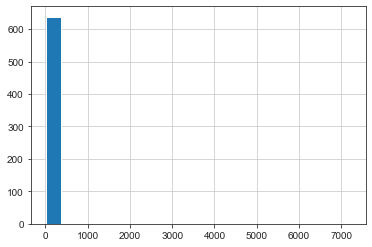

In [17]:
mainColumn['What_is_your_age'].hist(bins=20)
plt.show()

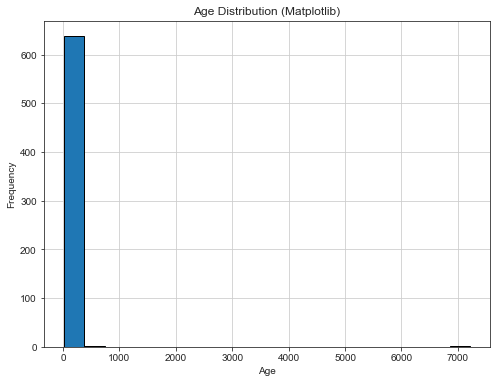

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(mainColumn['What_is_your_age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution (Matplotlib)')
plt.grid(True)
plt.show()

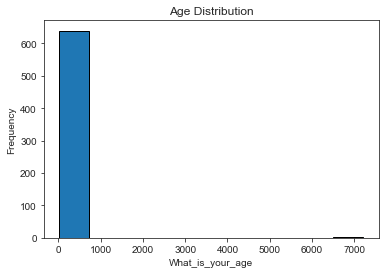

In [19]:
# Plot a histogram of the 'Age' column
plt.hist(mainColumn['What_is_your_age'], bins=10, edgecolor='black')
plt.xlabel('What_is_your_age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [20]:
for column in question.columns:  
    num_unique_categories = question[column].nunique()
    if num_unique_categories == 5:
#         print(f"Number of unique categories in '{column}': {num_unique_categories}")
        question.columns.get_loc(column)
        #print(numerical.columns.get_loc(column))

    else:
        column_locations_to_drop =question.columns.get_loc(column)
#         print(question.columns.get_loc(column))
        question.drop(question.columns[column_locations_to_drop], axis=1, inplace=False)
        



In [21]:
question.head(2)

,Respondent_ID,What_is_your_age,If_this_next_question_is_not_pertinent_to_your_job_you_could_skip_it_How_many_patients_were_assigned_to_you_on_your_last_shift,How_many_years_of_work_experience_do_you_have_since_graduating_Include_years_of_work_in_any_occupation,What_year_did_you_graduate_from_your_nursing_degree_program,How_long_in_years_have_you_worked_in_your_current_place_of_employment,What_is_the_average_number_of_hours_you_work_each_week,What_is_your_shift_length_in_hours,I_frequently_pretend_to_enjoy_something_when_in_actuality_I_really_don_t_Scale,I_try_to_act_in_a_manner_that_is_consistent_with_my_personally_held_values_even_if_others_criticize_or_reject_me_for_doing_so_Scale,...,If_I_had_my_way_I_would_not_be_working_in_my_industry_a_year_from_now_Scale,I_am_planning_on_searching_for_a_new_job_within_my_industry_within_the_next_year_Scale,I_frequently_think_of_leaving_my_job_at_this_organization_Scale,If_I_have_my_own_way_I_will_not_be_working_for_this_organization_one_year_from_now_Scale,Turnover intention,At_my_work_I_feel_bursting_with_energy_Scale,I_am_enthusiastic_about_my_job_Scale,I_am_immersed_in_my_work_Scale,Work engagement,Gender
0,114376890184,62.0,70.0,27.0,1996.0,2.0,30.0,8.0,1,5,...,1.0,2.0,1.0,1.0,5,0.0,3.0,6.0,9,1.0
1,114376847890,47.0,31.0,25.0,2001.0,20.0,36.0,12.0,4,3,...,5.0,1.0,5.0,5.0,16,1.0,1.0,1.0,3,0.0


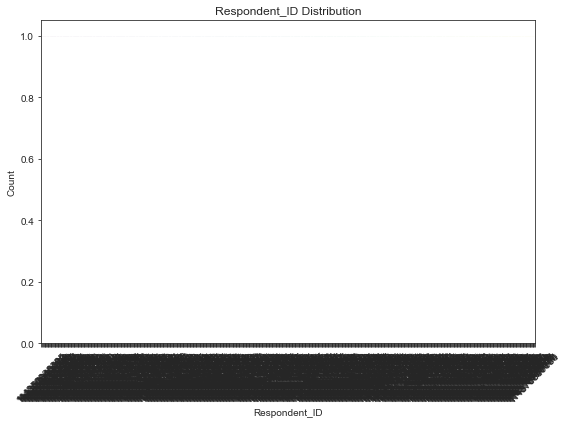

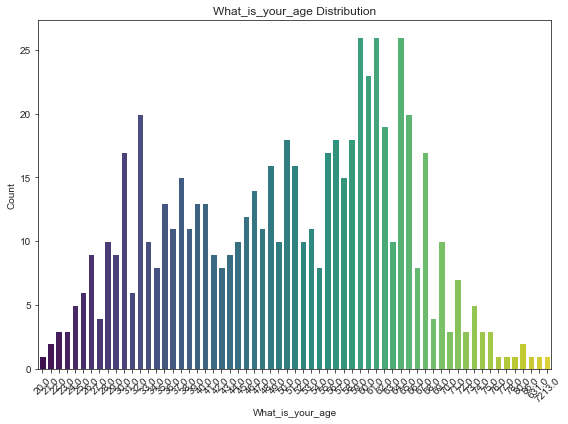

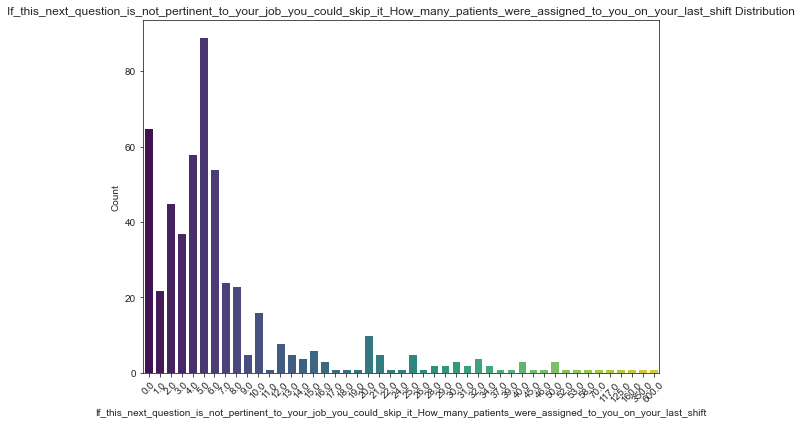

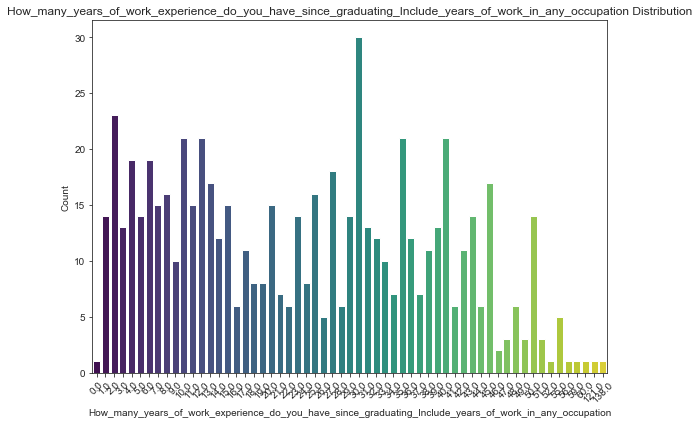

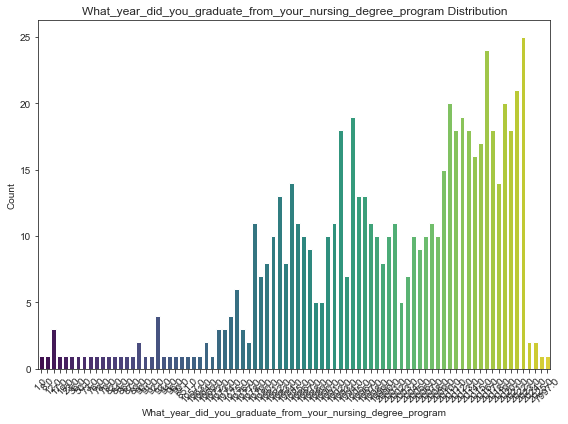

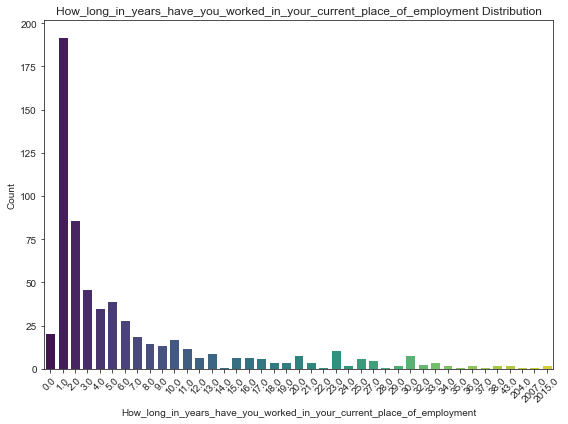

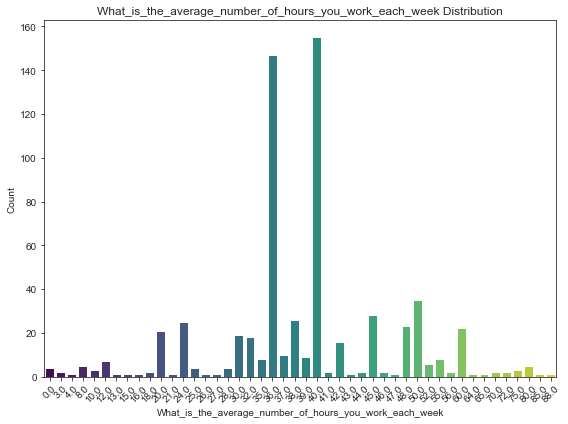

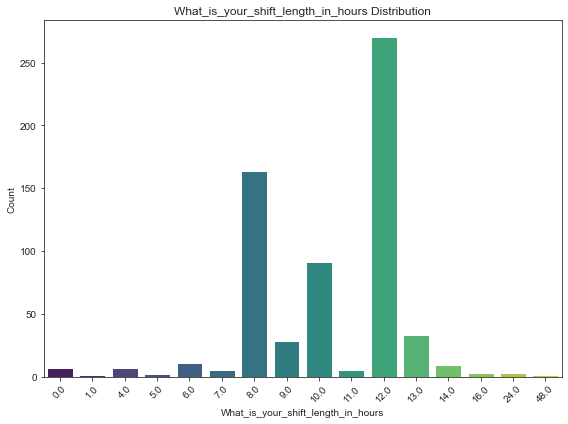

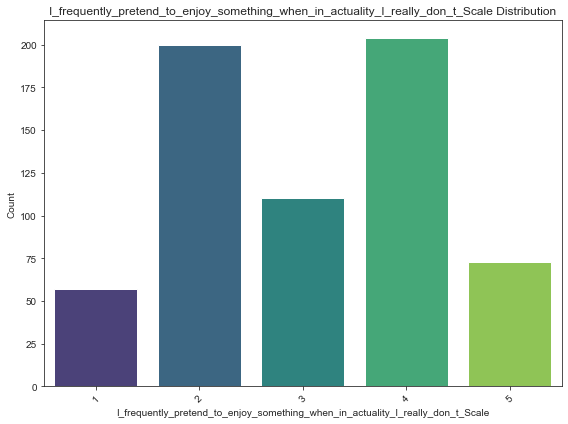

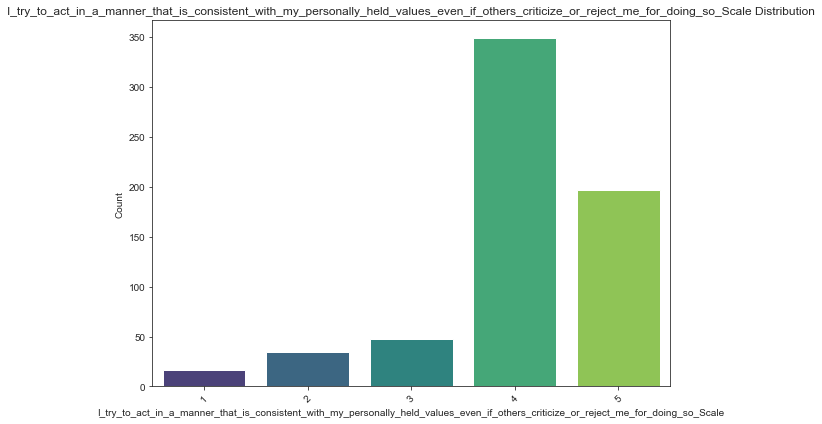

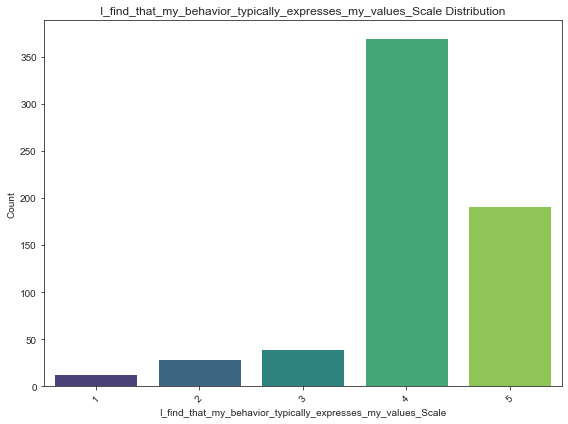

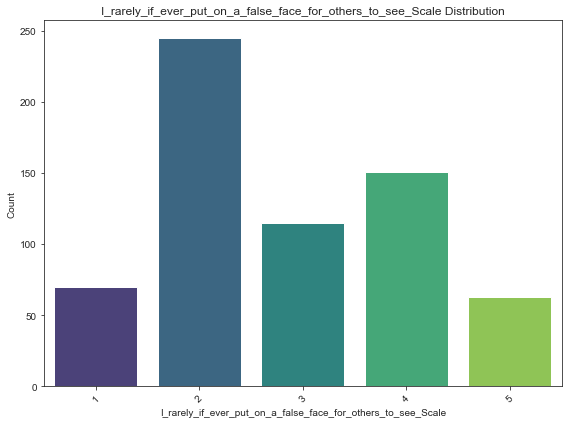

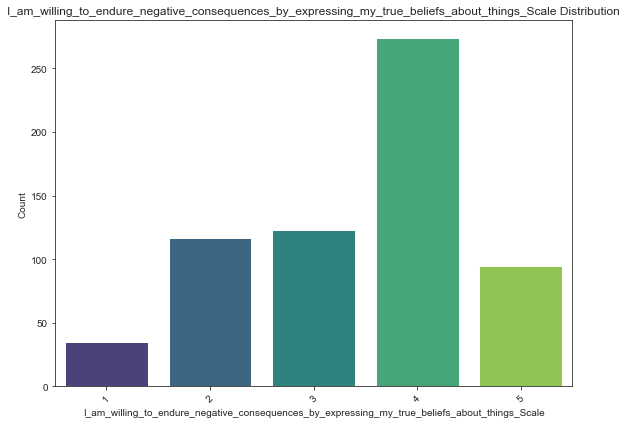

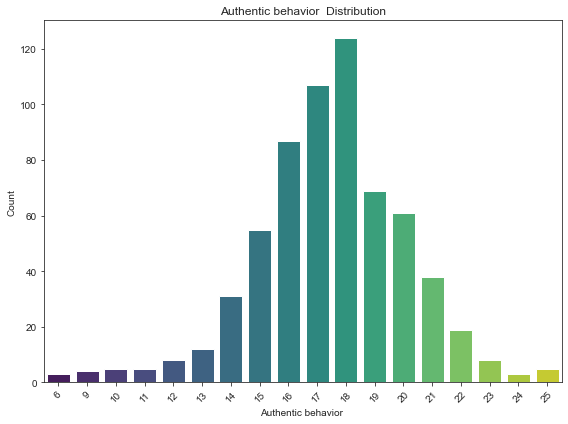

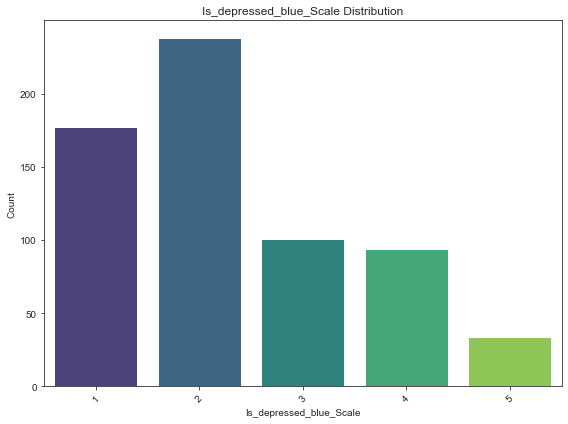

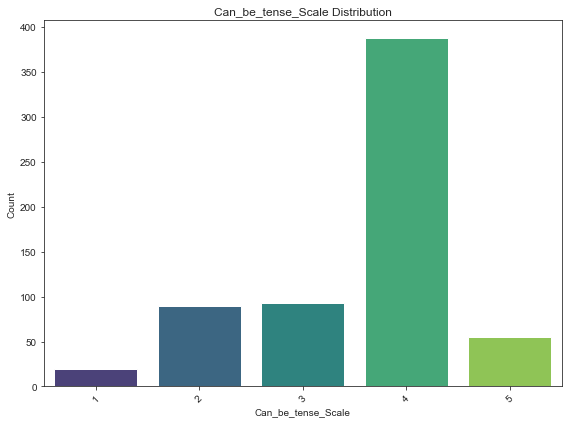

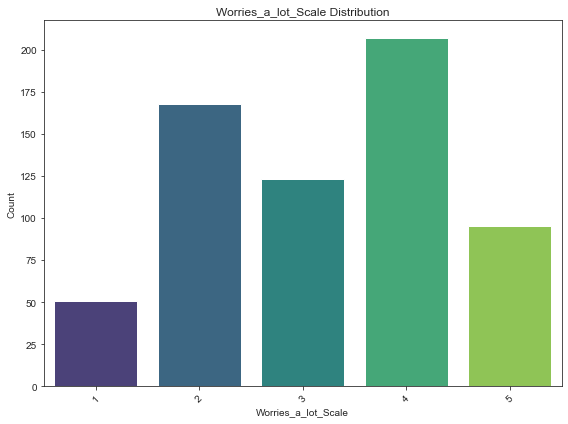

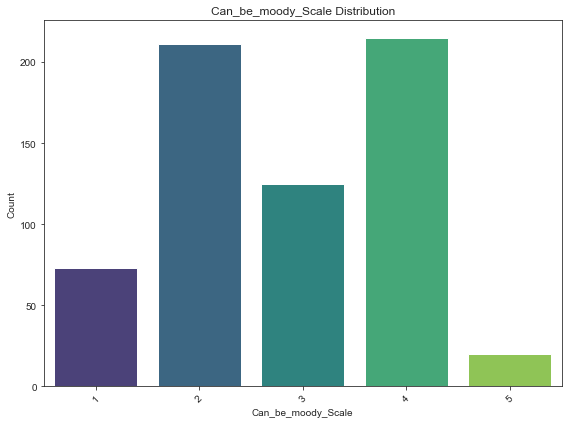

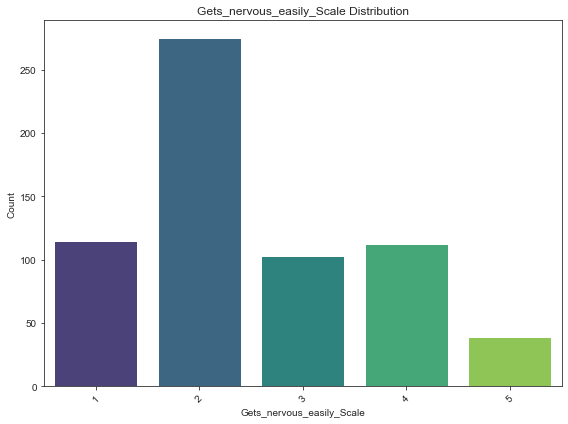

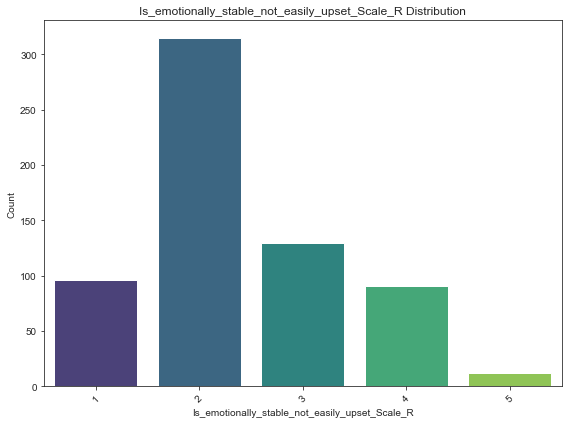

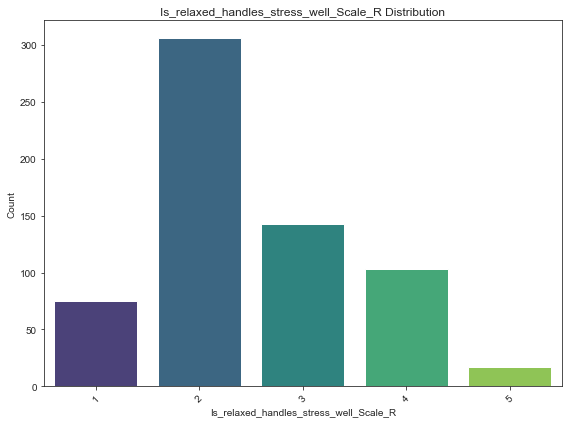

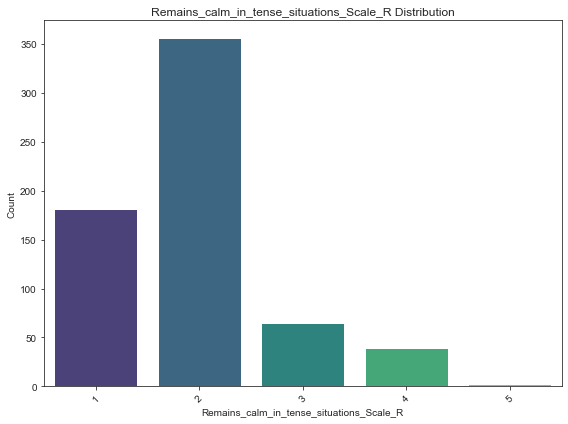

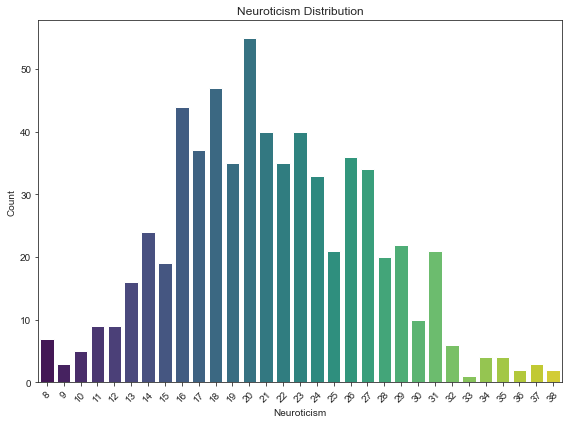

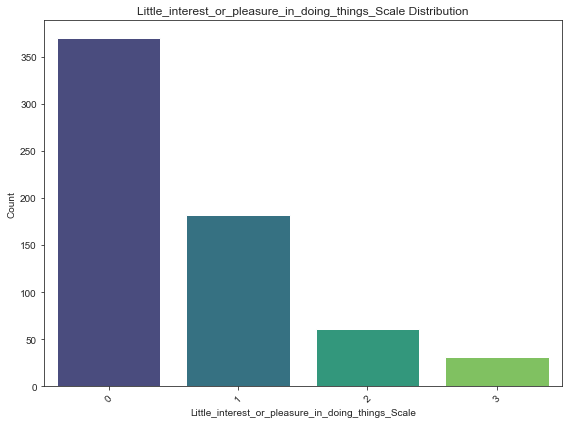

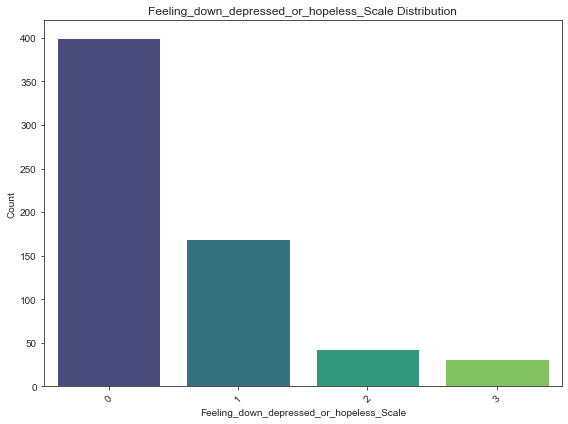

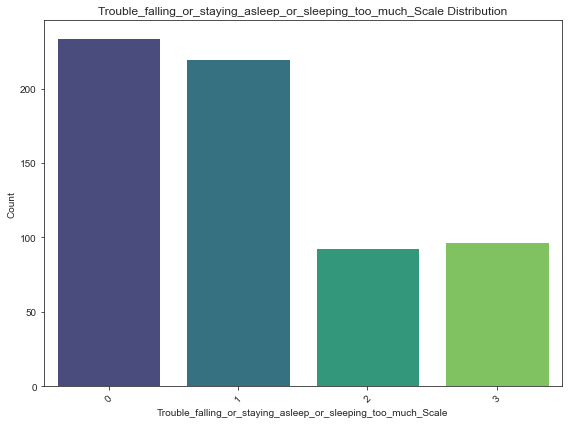

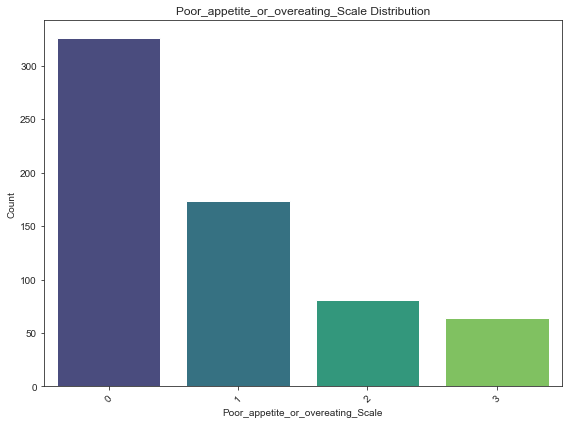

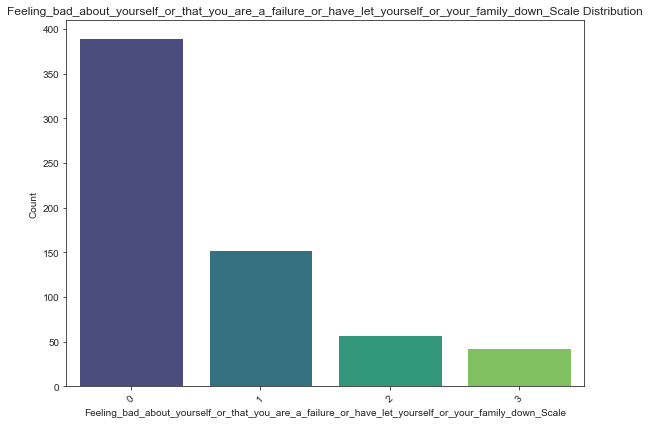

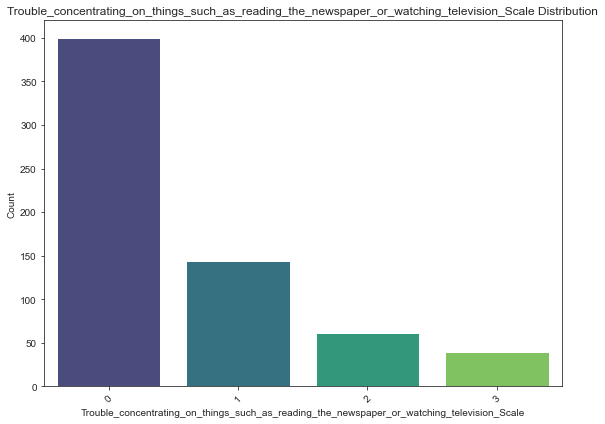

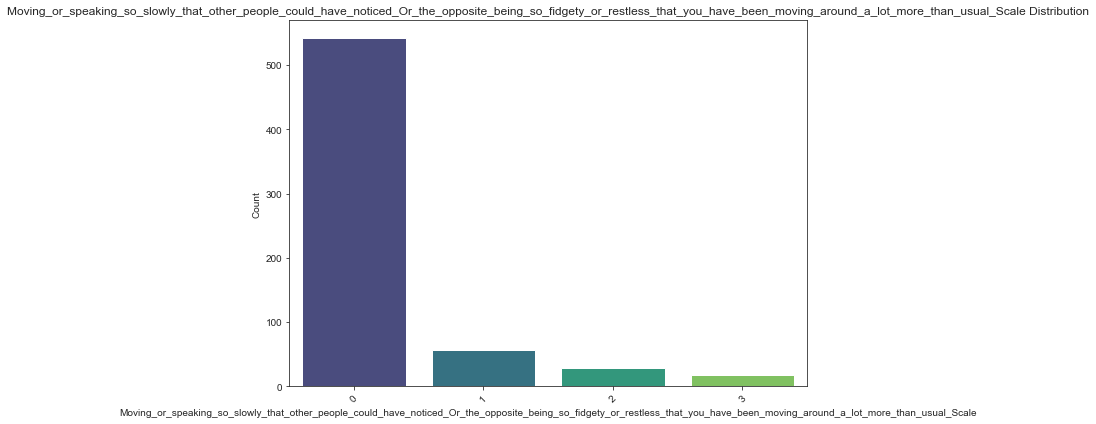

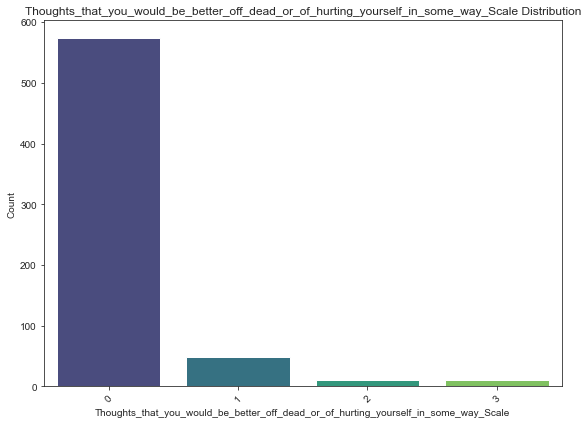

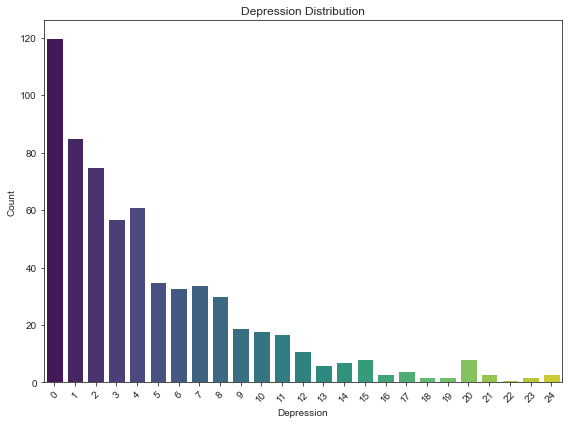

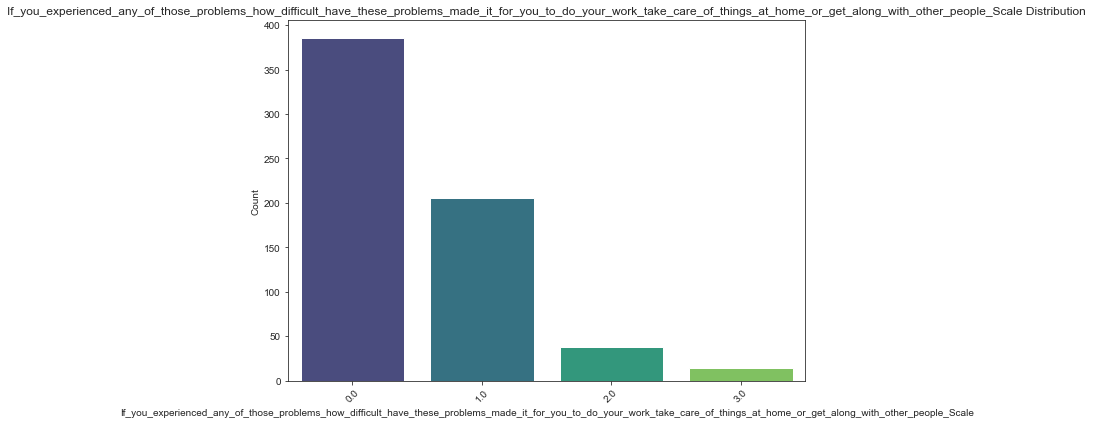

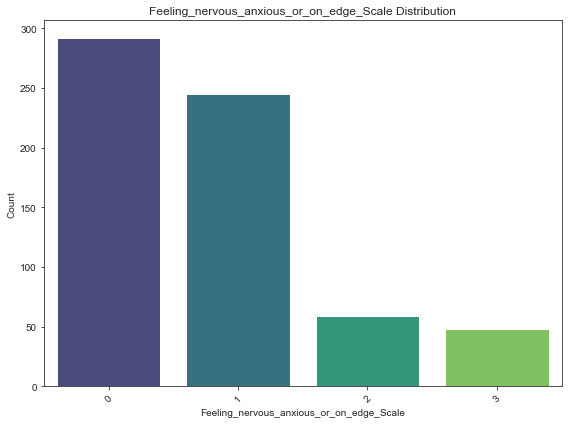

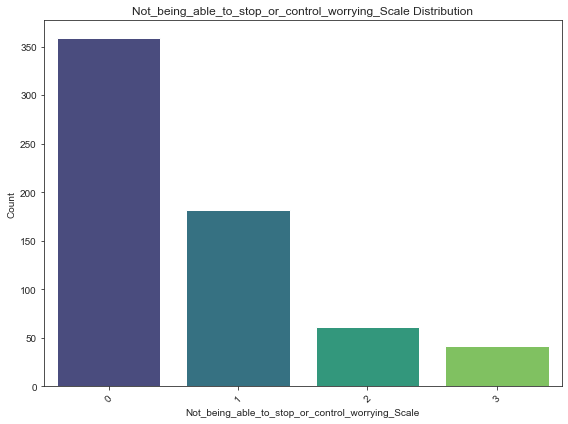

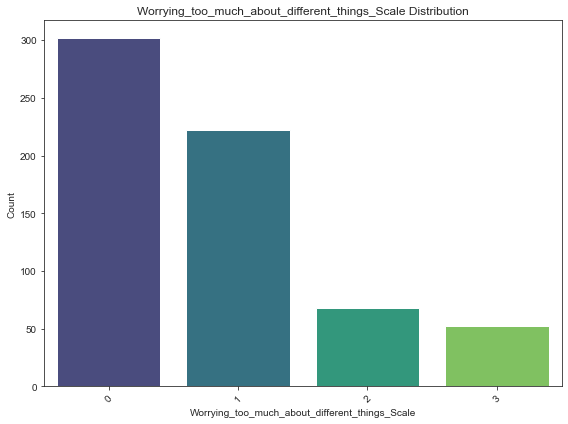

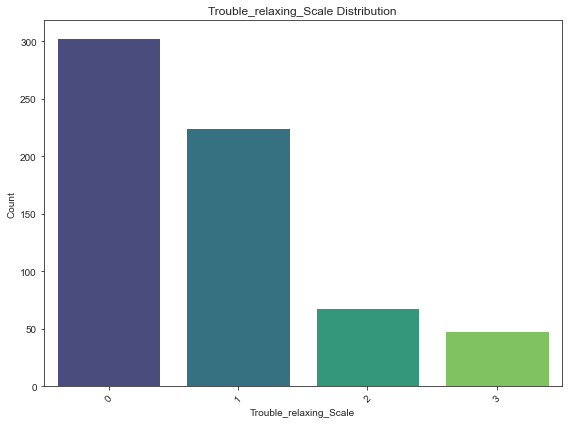

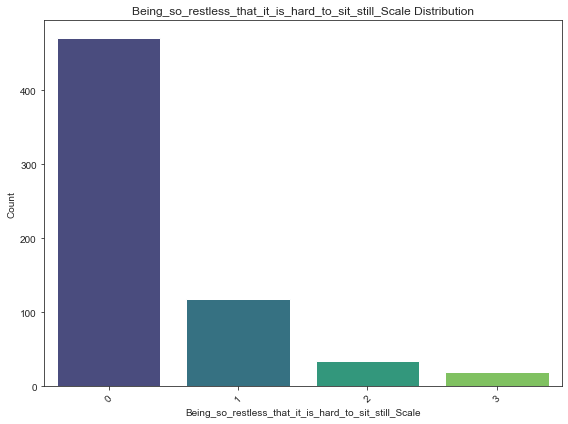

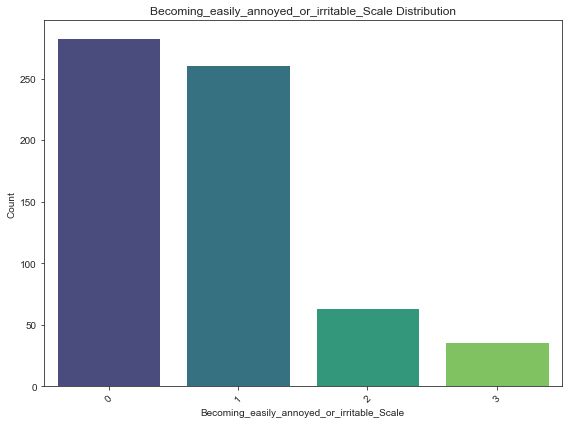

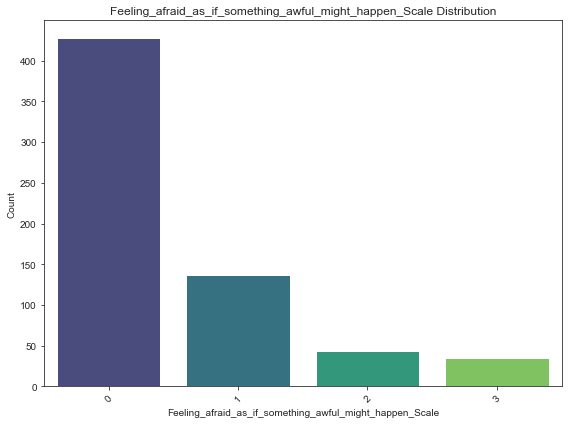

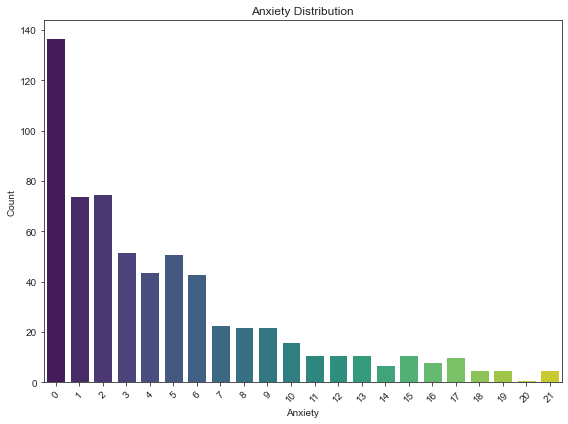

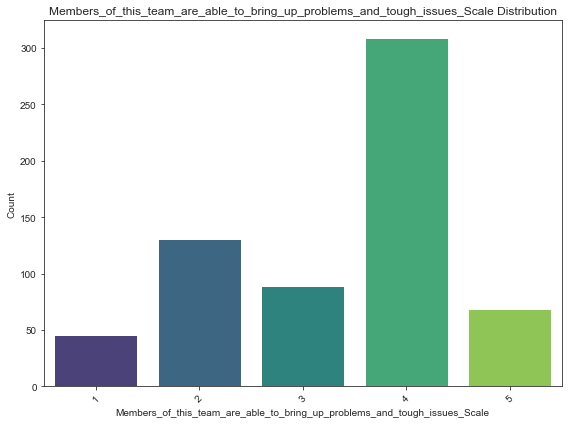

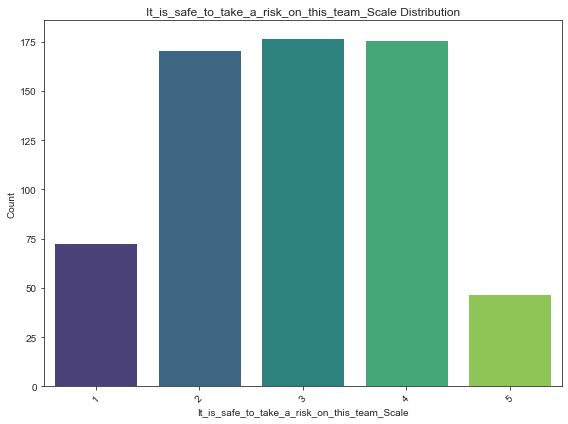

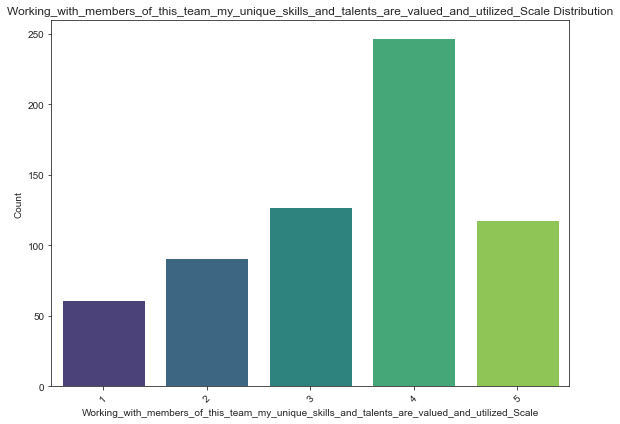

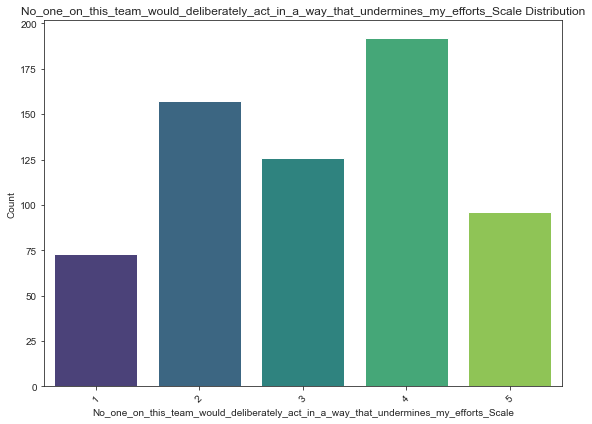

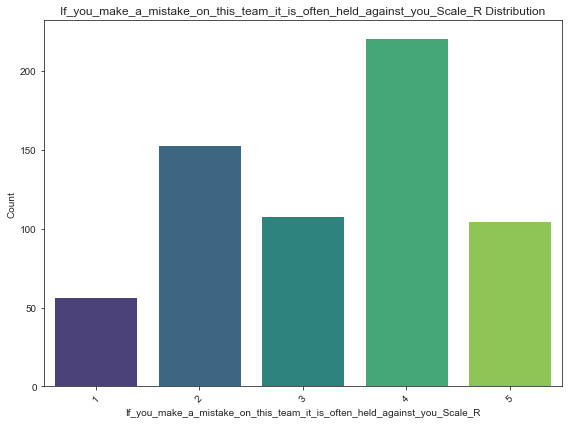

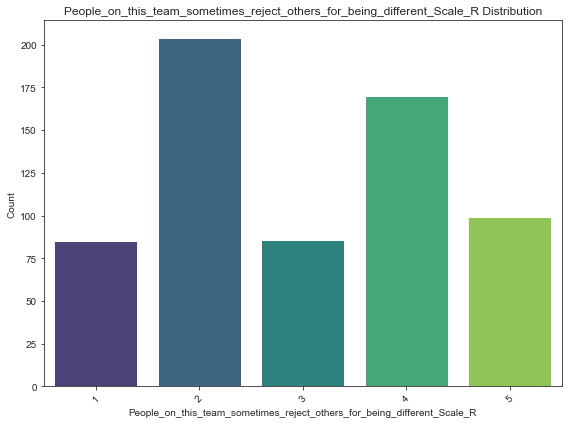

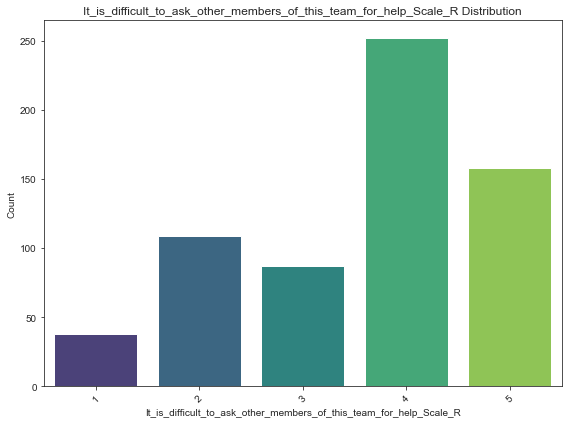

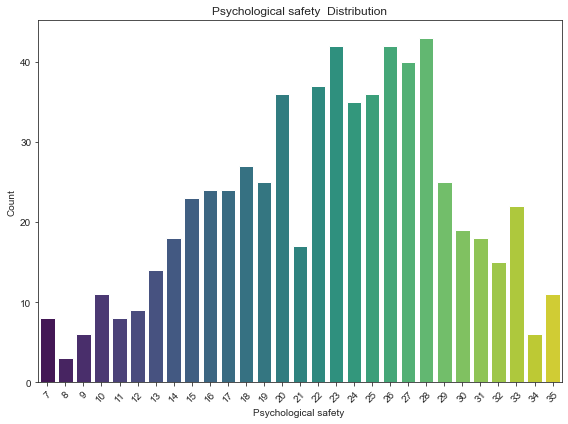

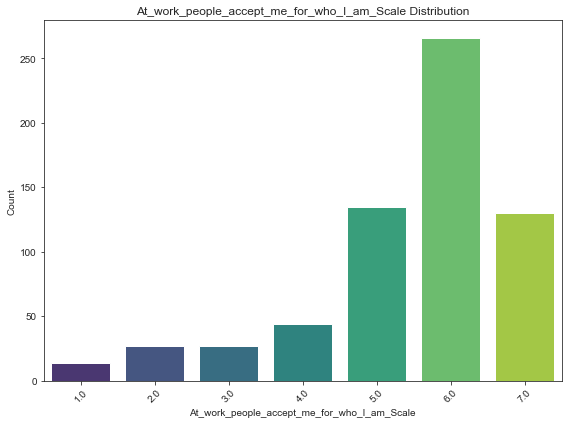

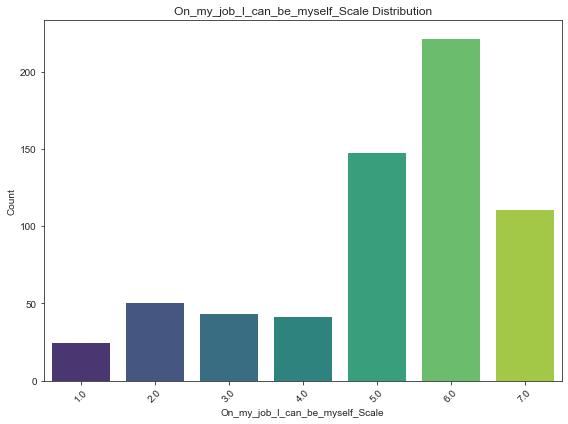

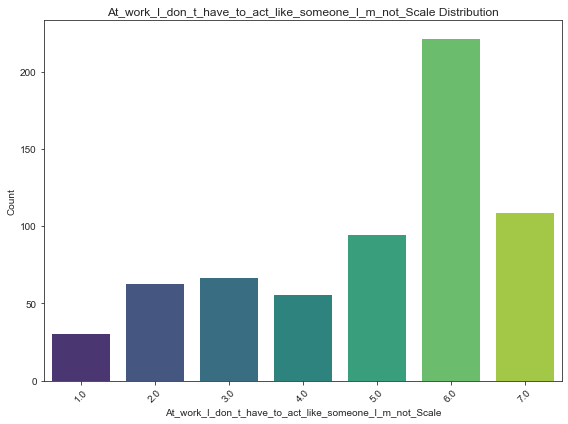

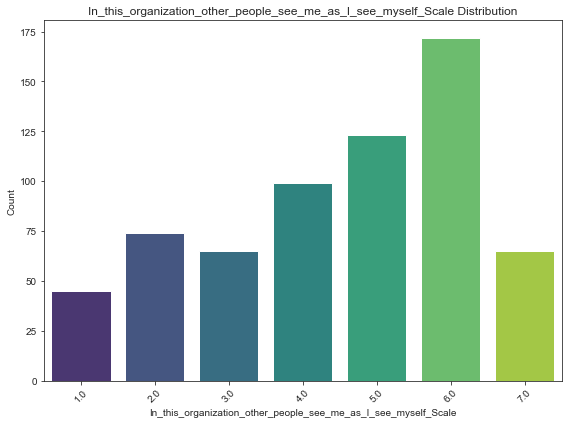

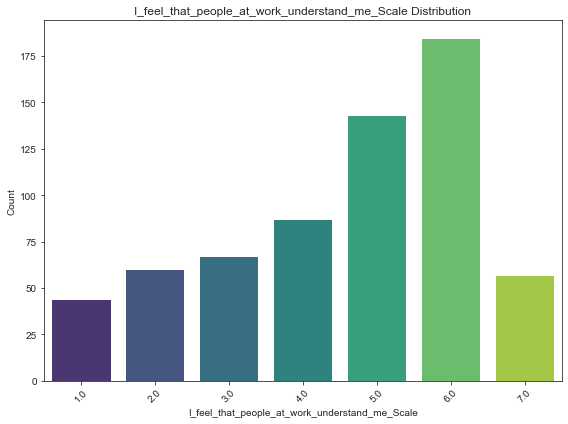

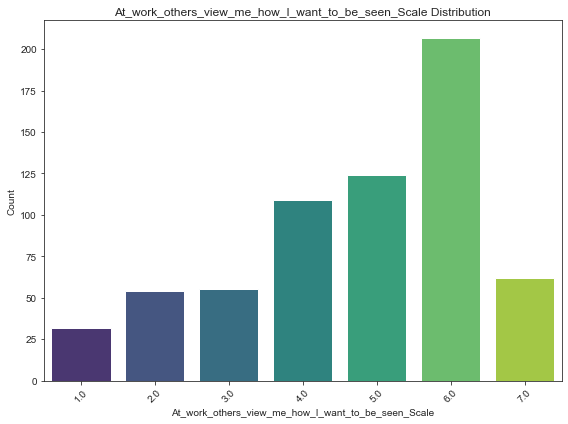

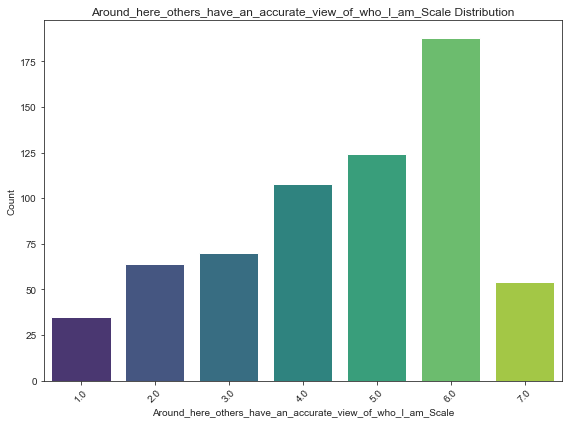

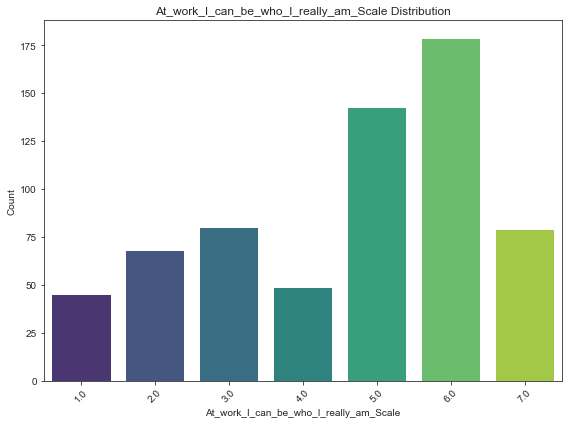

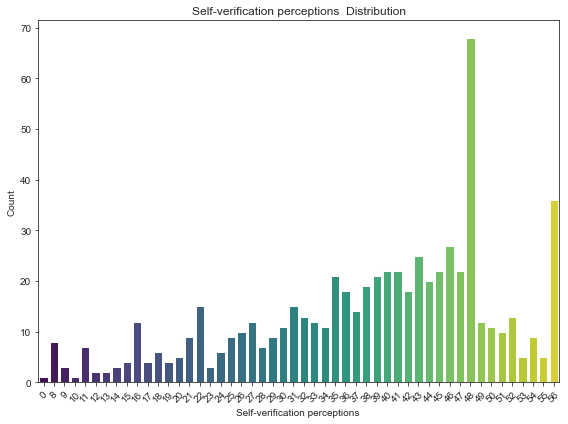

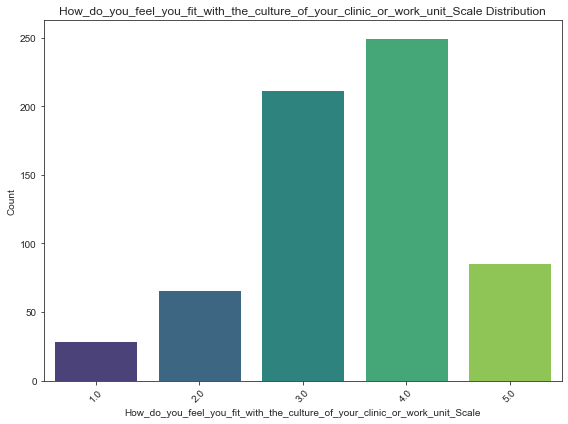

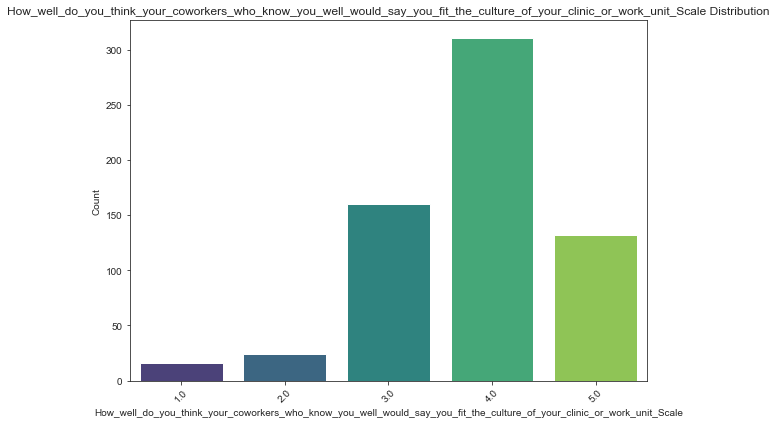

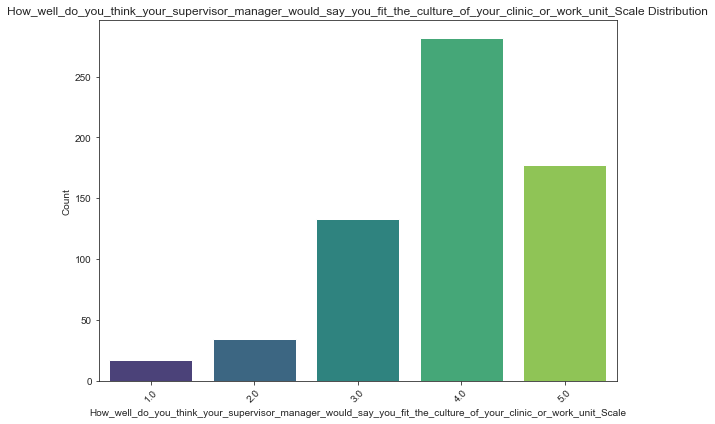

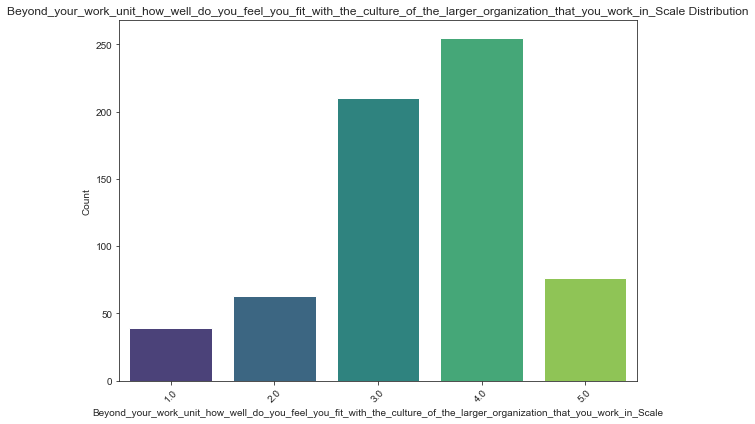

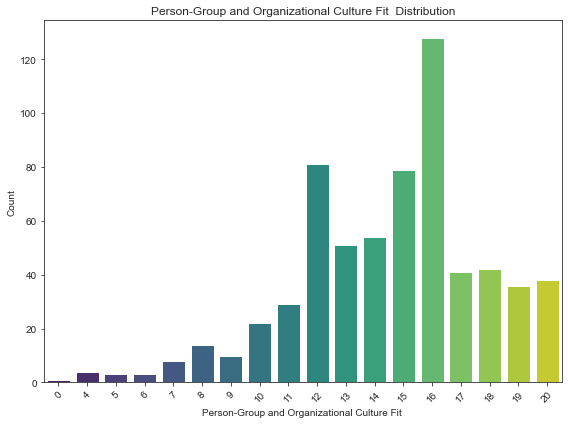

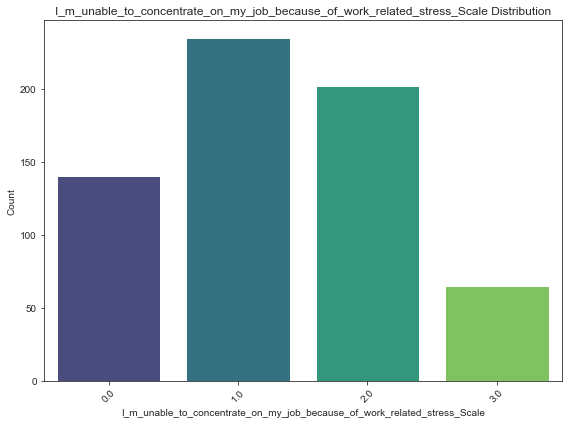

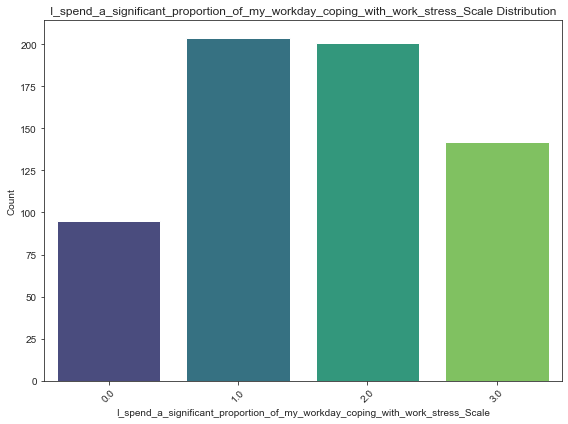

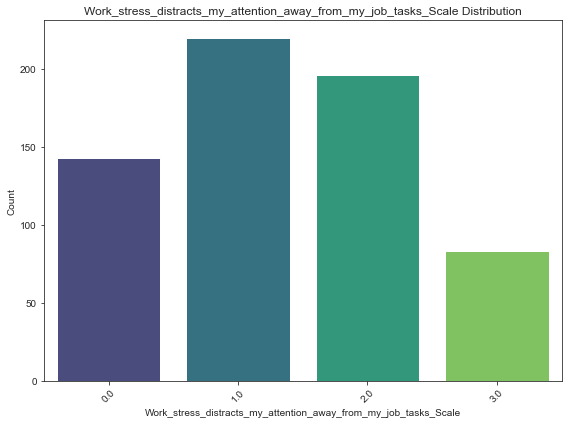

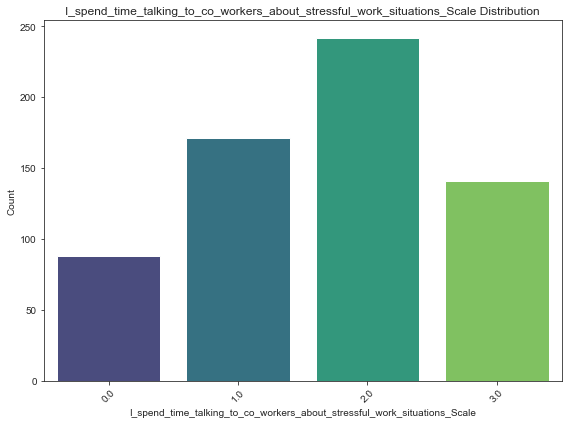

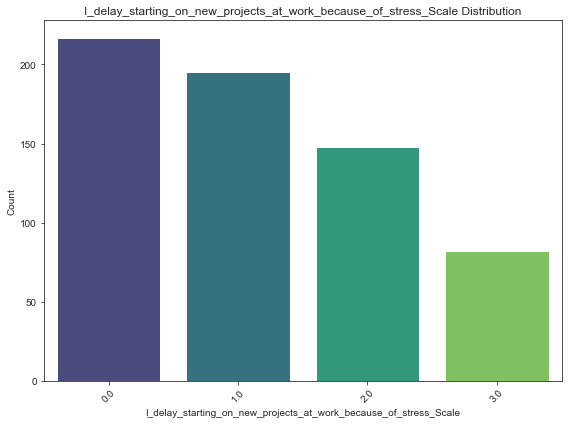

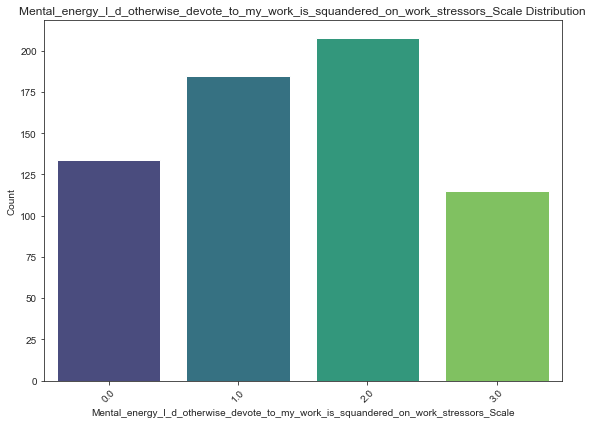

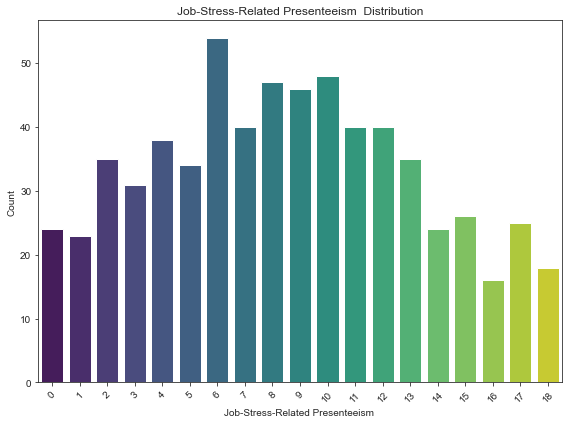

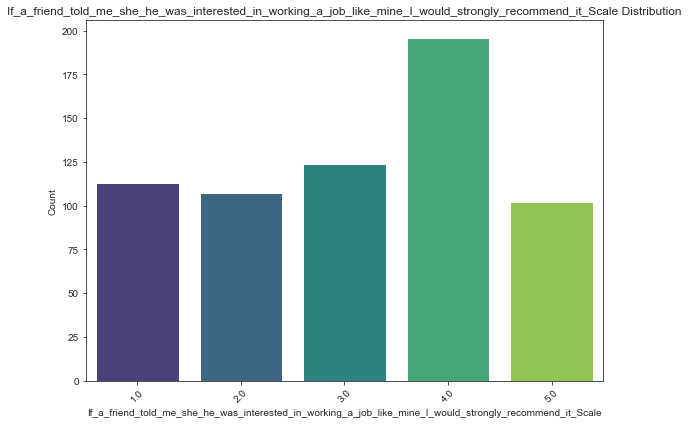

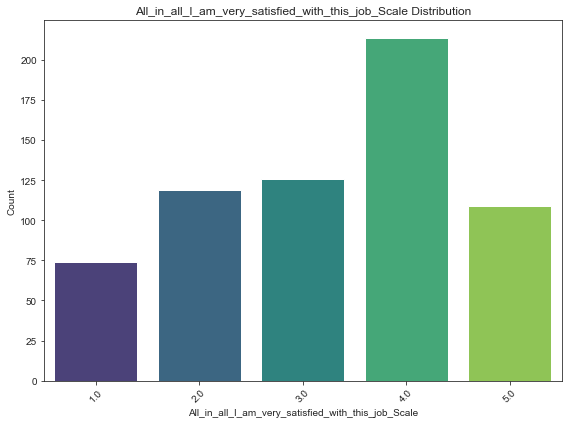

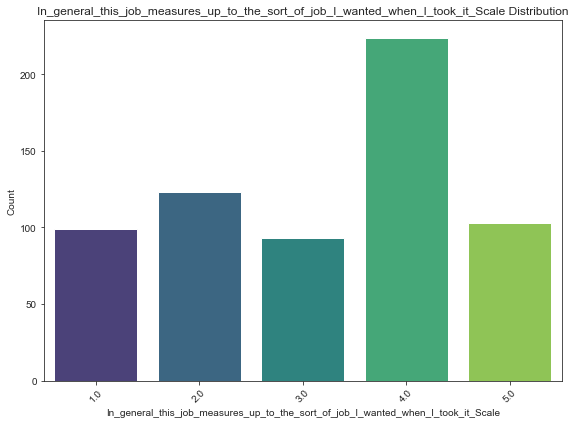

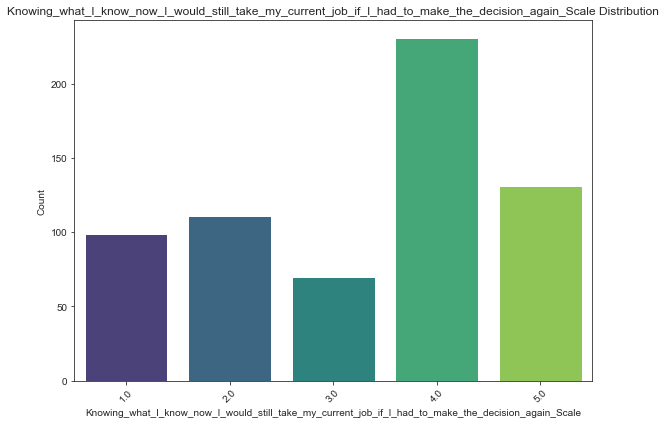

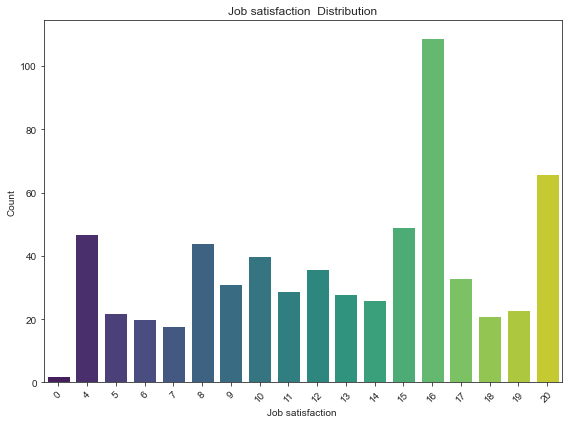

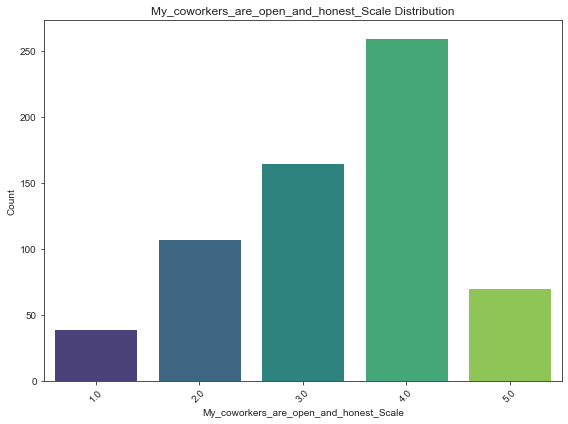

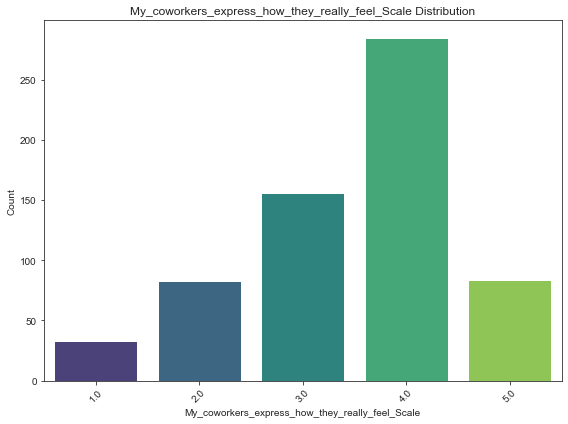

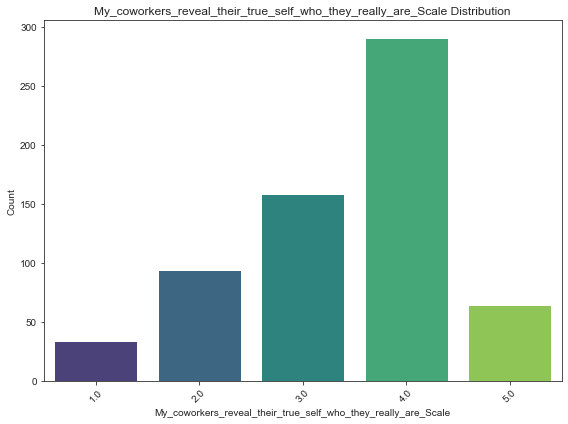

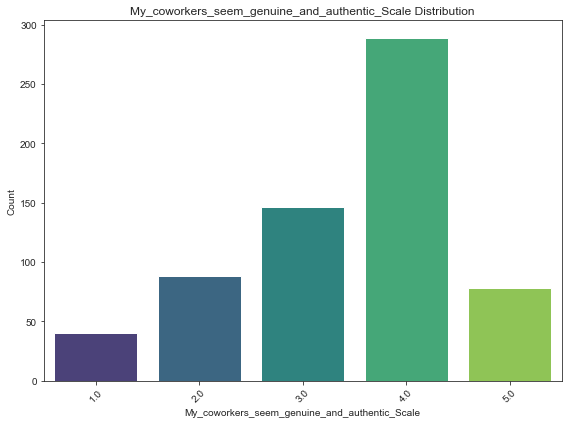

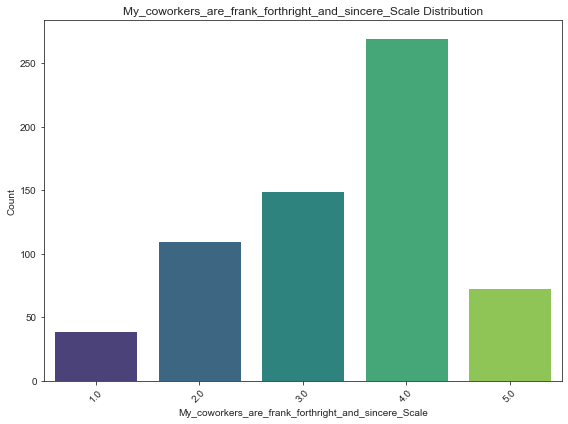

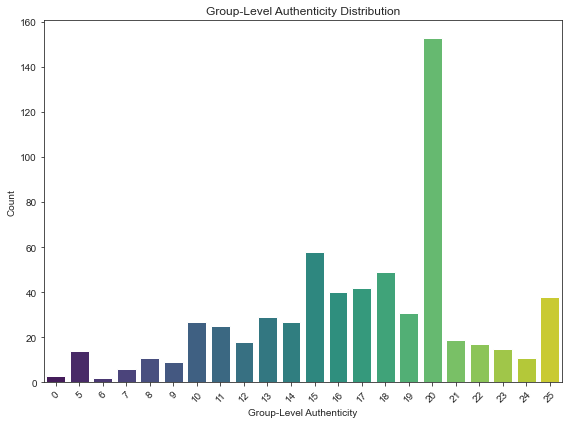

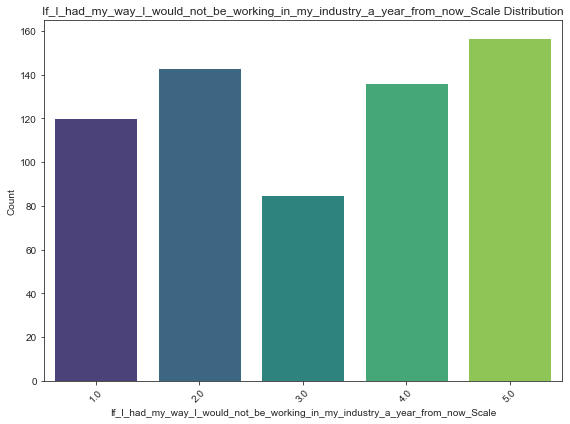

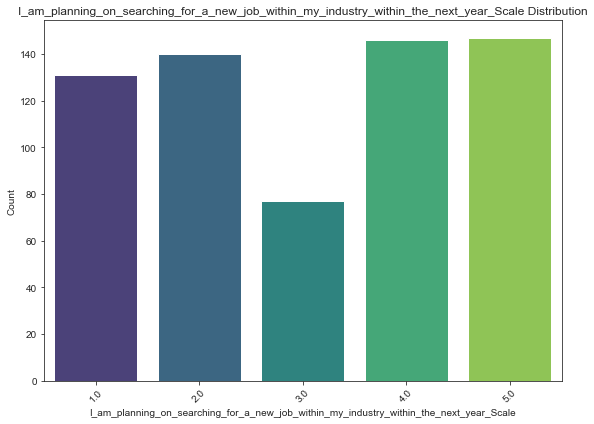

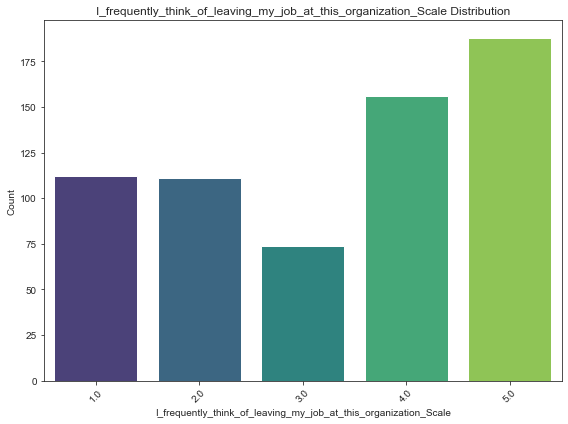

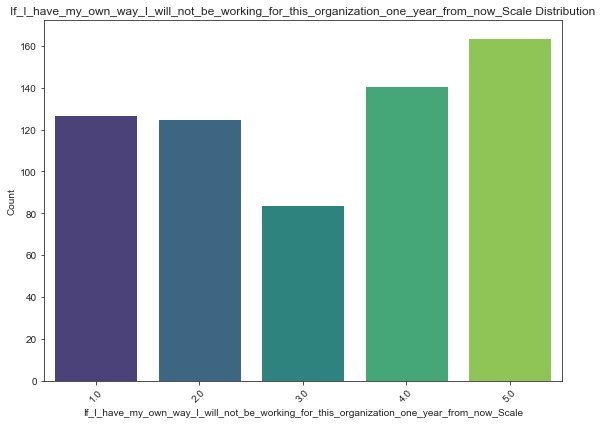

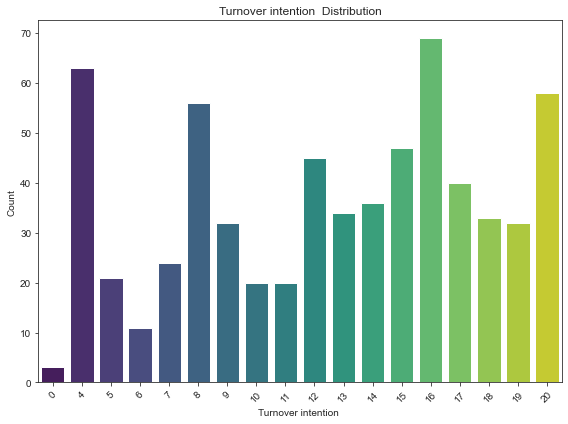

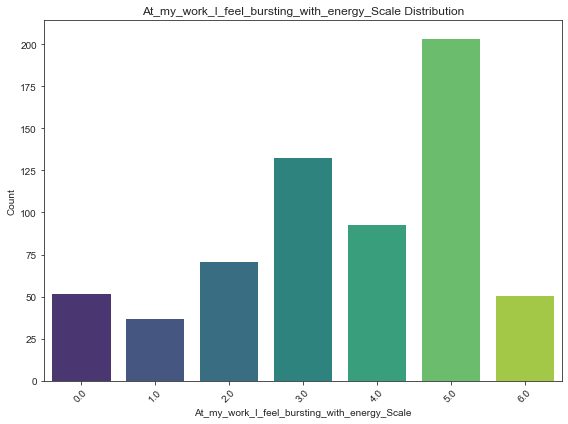

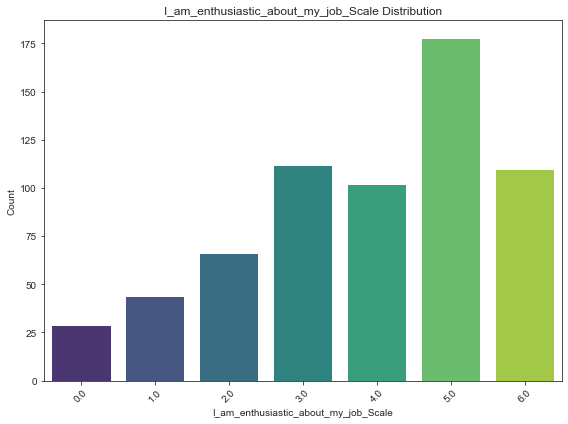

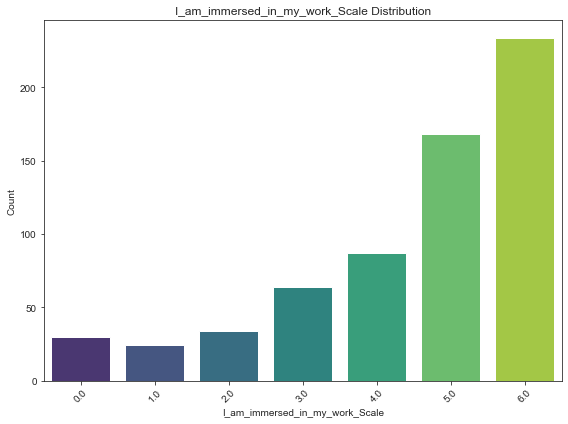

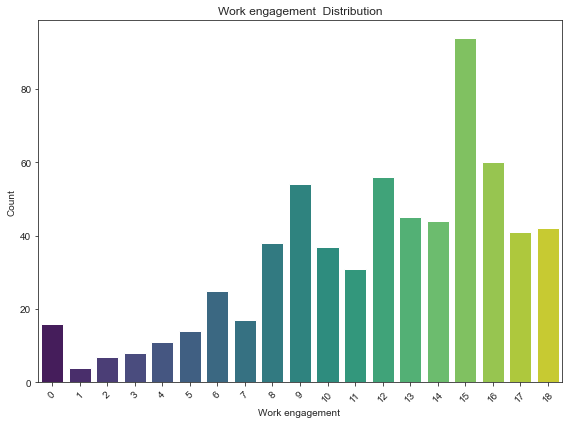

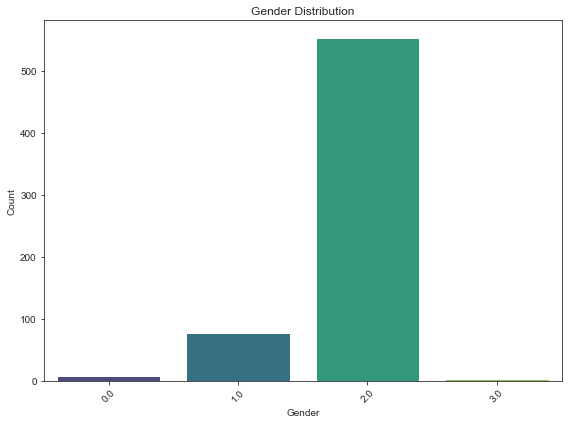

In [22]:
for column in question.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=question, palette='viridis')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [23]:
column_locatioAuthentic_behavior  = numerical.columns.get_loc('Authentic behavior')
column_locatioAuthentic_behavior

13

In [24]:
column_locatioNeuroticism  = numerical.columns.get_loc('Neuroticism')
column_locatioNeuroticism Depression

SyntaxError: invalid syntax (temp/ipykernel_3052/2098264927.py, line 2)

In [ ]:
column_locatioDepression  = numerical.columns.get_loc('Depression')
column_locatioDepression 

In [ ]:
column_locatioIf_you_experienced_any  = numerical.columns.get_loc('If_you_experienced_any_of_those_problems_how_difficult_have_these_problems_made_it_for_you_to_do_your_work_take_care_of_things_at_home_or_get_along_with_other_people_Scale')
column_locatioIf_you_experienced_any 

In [ ]:
column_locatioAnxiety  = numerical.columns.get_loc('Anxiety')
column_locatioAnxiety 

In [ ]:
column_locatioPsychologicalsafety = numerical.columns.get_loc('Psychological safety')
column_locatioPsychologicalsafety 

In [ ]:
column_locatioVerification = numerical.columns.get_loc('Self-verification perceptions')
column_locatioVerification 

In [ ]:
column_locatioPerson = numerical.columns.get_loc('Person-Group and Organizational Culture Fit')
column_locatioPerson 

In [ ]:
column_locatioStress = numerical.columns.get_loc('Job-Stress-Related Presenteeism')
column_locatioStress 

In [ ]:
column_locatiosatisfaction = numerical.columns.get_loc('Job satisfaction')
column_locatiosatisfaction

In [ ]:
column_locatioGroup_Level_Authenticity = numerical.columns.get_loc('Group-Level Authenticity')
column_locatioGroup_Level_Authenticity  

In [ ]:
column_locationTurnover_intention = numerical.columns.get_loc('Turnover intention')
column_locationTurnover_intention

In [ ]:
column_locationWork = numerical.columns.get_loc('Work engagement')
column_locationWork

In [ ]:
column_locationWork = numerical.columns.get_loc('Gender')
column_locationWork

In [ ]:
df_dropped = numerical.drop(numerical.columns[1], axis=1)

In [ ]:
numerical_dropped = numerical.drop(numerical.columns[0:8], axis=1)
numerical_dropped

In [ ]:
numerical_dropped = numerical.drop(numerical.columns[column_locations_to_drop], axis=1)

In [ ]:
numerical = numerical.drop(columns=['columns_to_drop'], inplace=False)  # Set inplace=True to modify the original DataFrame

In [ ]:
# # Print column names using a loop
# for column in df.columns:
#     print(column)

In [ ]:
categorical = df.select_dtypes(include = 'object')
print(len(categorical.columns))
categorical

In [ ]:
# categorical = categorical.dropna()
# categorical

categorical.columns = categorical.columns.str.strip()
categorical

In [ ]:
for column in categorical.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=categorical, palette='viridis')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
sns.countplot(categorical['What_is_the_time_of_your_shift'])

In [ ]:
numerical = df.select_dtypes(include = ['float64', 'int64'])
print(len(numerical.columns))

In [ ]:
numerical.columns = numerical.columns.str.strip()

In [ ]:
# Print column names using a loop
for column in numerical.columns:
    print(column)

In [ ]:
numerical = numerical.dropna()

In [ ]:
numerical

In [ ]:
gender = "Gender == 2"
What_is_your_age = "What_is_your_age > 30"

In [ ]:
result = numerical.query(f"{gender} & {What_is_your_age}")

In [ ]:
result

In [ ]:
result

In [ ]:
# sns.kdeplot(numerical['What_is_your_age'])

In [ ]:
sns.factorplot(data=numerical, kind = 'count', size=5, aspect=3, x = 'Gender')

In [ ]:
# cor_mat = numerical.corr()
# mask = np.array(cor_mat)
# mask[np.tril_indices_from(mask)] = False
# fig = plt.gcf()
# fig.set_size_inches(60,12)
# sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

In [ ]:
continuous = ['What_is_your_age', 'Gender','Authentic behavior','Turnover intention']

In [ ]:
for var in continuous:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig = numerical.boxplot(column = var)
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig = numerical[var].hist(bins=20)
    fig.set_ylabel('No of Nurse')
    fig.set_xlabel(var)
    
    
    plt.show()

In [ ]:
sns.countplot(numerical['Gender'])

In [ ]:
for column in numerical.columns:
    if column != 'Respondent_ID':  # Skip non-question columns
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=numerical, palette='viridis')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=numerical['Gender'], data=numerical, palette='viridis')
plt.title('Distribution')
plt.xlabel(column)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(numerical['Authentic behavior'])

In [ ]:
# sns.distplot(numerical['What_is_your_age'])

In [ ]:
numerical.info()

In [ ]:
numerical.info()

In [ ]:
numerical.describe()

In [ ]:
# corr = numerical.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
# df['Turnover intention'].value_counts()
numerical['Turnover intention'].value_counts()

In [ ]:
sns.countplot(x='Gender', data=numerical)
plt.title('Gender Distribution')
plt.show()

In [ ]:
# Example: Perform chi-squared test for two categorical variables
contingency_table = pd.crosstab(numerical['Gender'], data['Turnover intention'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
# print("Chi-squared statistic:", chi2)
# print("P-value:", p)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Responses': ["Disagree", "Agree", "Neither agree nor disagree", 
                  "Strongly agree", "Strongly disagree", "Agree", "Agree", "Disagree"]
}

df = pd.DataFrame(data)

# Define the order of categories for proper plotting
response_order = [
    "Strongly disagree", "Disagree", "Neither agree nor disagree", 
    "Agree", "Strongly agree"
]

# Count the occurrences of each response category
response_counts = df['Responses'].value_counts().reindex(response_order, fill_value=0)

# Create a bar plot
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Responses')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Prepare the summary table (please clean the data beforehand)
def prepare_table(numerical, column_range, group_column_name='group'):
    res: []
    col_range_index: list(column_range)
    group_index: data.columns.to_list().index(group_column_name)
    col_range_index.append(group_index)
    series: data.iloc[:, col_range_index].groupby(
      [group_column_name]).count().unstack()

    for group in series.index.levels[1]:
        for var in series.index.levels[0]:
            res.append(
                [
                    (series[var][group] / data.loc[
                      :,group_column_name].value_counts()[group] * 100).round(2),
                    codebook.iloc[int(var[1:]), 1],
                    group,
                ]
            )

    return pd.DataFrame(columns=["percentage(%)", "options",
                                 group_column_name], data=res)



In [ ]:
# Generate the checkbox chart based on the summary table
def gen_chart_checkbox(data, column_range, group_column_name='group'):
    listOfGroup: list(data.loc[:,group_column_name].unique())
    listOfGroup.sort()
    table_sum: prepare_table(data, column_range, group_column_name)
    print("Number of answers in each group: ")
    print(data.loc[:,group_column_name].value_counts())

    fig, ax: plt.subplots(figsize=(10, 8))
    ax: sns.barplot(
        x="percentage(%)",
        y="options",
        hue=group_column_name,
        hue_order=listOfGroup,
        data=table_sum,
    )

    ax.set(xlim=(0, 100))
    ax.set_ylabel("")
    plt.title(codebook.iloc[column_range[0], 0], fontsize=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
               borderaxespad=0.0, title="group")
    return plt.show(